# Part I - Exploring Prosper Loan Data
## by Israel Ogunmola

## Introduction
---

If you want to consolidate debt, finance a large purchase, or cover an emergency expense, a personal loan can be immensely useful. However, many personal loan lenders require borrowers to have good or excellent credit, making it difficult to qualify for a loan. Borrowers with credit ratings in the fair range or below may have better chances of obtaining loans at a better rate by working with a peer-to-peer lender.

[Prosper is a personal loan pioneer](https://www.prosper.com/) — the US company became the first firm to enter the peer-to-peer lending arena when it launched in 2005. Since then, the platfom has originated more than 20 billion USD in personal loans by matching over 1,170,000 borrowers to potential investors through its online platform. Prosper offers unsecured personal loans to customers who have a minimum credit score of 640. It also provides home equity lines of credit (HELOCs).

Our goal is to explore a sample of Prosper loan data to uncover borrower motivations when applying for loans, and identify several factors that may influence loan favorability.

## Importing Libraries
---
 
A great way to start is by importing the libraries and packages we need. We will import the **Numpy** and **Pandas** libraries to help us load and perform quick, vectorized operations on our data, then the **Matplotlib** and **Seaborn** libraries to help us build informing visuals:

In [1]:
# Data analysis and visualization packages
import numpy as np
import pandas as pd
import requests
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization behaviours
%matplotlib inline
plt.style.use('tableau-colorblind10')

## Preliminary Wrangling
---
We will start by importing our dataset, `prosperLoanData.csv`, then reading it into a pandas dataframe:

In [2]:
df = pd.read_csv('./prosperLoanData.csv')

In [3]:
# Display quick summary information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### Initial Notes on Dataset Structure:
>- The dataframe comprises **113,937** rows and **81** columns (features). 56 of these 81 columns (69%) contain numeric data. There is a wealth of information that describes the situations surrounding each loan in the dataset.

### Features of Interest
The dataset currently contains loads of information. However, the goal of this exploration is to understand the different borrower motivations when applying for loans, including the different factors that may influence loan favorability. As a result, we will direct our exploratory efforts towards the following features:
>(1.) **ListingCreationDate:** The date the listing was created.

>(2.) **ListingCategory (numeric):** The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans.

>(3.) **BorrowerState:** The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.

>(4.) **isBorrowerHomeowner:** A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

>(5.) **IncomeRange:** The income range of the borrower at the time the listing was created.

>(6.) **IncomeVerifiable:** The borrower indicated they have the required documentation to support their income.

>(7.) **DebtToIncomeRatio:** The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

>(8.) **StatedMonthlyIncome:** The monthly income the borrower stated at the time the listing was created.

>(9.) **ProsperRating (Alpha):** The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.

>(10.) **Term:** The length of the loan expressed in months.

>(11.) **EmploymentStatus:** The employment status of the borrower at the time they posted the listing.

>(12.) **LoanStatus:** The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

>(13.) **LoanOriginalAmount:** The origination amount of the loan.

>(14.) **BorrowerAPR:** The Borrower's Annual Percentage Rate (APR) for the loan.

Generally, we aim to measure loan favorability in terms of **Prosper rating** and **Annual percentage rate (borrower APR)**.

## Data Assessment
---
We will now assess our dataframe, with particular focus on the features of interest. The major goal here is data exploration, hence findings on quality and tidiness will be collated under the assessment summary, and addressed using a brief and concise cleaning workflow.

First, let's create a list containing the key features for our analysis:

In [4]:
# Create a list of key feature names
key_features = ['ListingCreationDate', 'ListingCategory (numeric)', 'BorrowerState', 'IsBorrowerHomeowner',
                'IncomeRange', 'IncomeVerifiable', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)',
                'EmploymentStatus', 'LoanStatus', 'LoanOriginalAmount', 'BorrowerAPR']

Next, we will examine a sample of records from these features in pandas, coupled with thorough visual assessments in a spreadsheet software like Ms Excel:

In [5]:
# Visually assess portions of the dataframe containing key features
df[key_features].sample(20)

,ListingCreationDate,ListingCategory (numeric),BorrowerState,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,DebtToIncomeRatio,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,LoanStatus,LoanOriginalAmount,BorrowerAPR
97467,2014-01-29 20:05:44.297000000,1,OK,True,"$25,000-49,999",True,0.49,4133.333333,60,C,Employed,Current,15000,0.19630
48386,2009-09-08 08:18:23.627000000,1,AR,True,"$50,000-74,999",True,0.35,4583.333333,36,A,Full-time,Completed,12000,0.12410
103936,2013-08-01 13:33:25.983000000,1,MO,False,"$25,000-49,999",True,0.27,3166.666667,60,D,Employed,Current,10000,0.28386
10719,2010-08-03 18:26:38.910000000,1,CA,False,"$25,000-49,999",True,0.21,3166.666667,36,HR,Employed,Completed,3000,0.21291
82569,2006-11-15 05:00:55.477000000,0,NaN,True,Not displayed,True,0.04,25416.666667,36,NaN,Not available,Completed,8000,0.20735
53429,2013-12-30 10:23:16.217000000,1,CA,True,"$100,000+",True,0.25,8333.333333,36,AA,Employed,Current,20000,0.08496
27386,2013-09-30 16:23:11.363000000,1,IN,False,"$25,000-49,999",True,0.22,2916.666667,36,B,Employed,Current,4000,0.19859
88256,2007-03-30 23:28:22.497000000,0,WA,False,"$1-24,999",False,10.01,0.083333,36,NaN,Self-employed,Completed,3500,0.13393
84436,2014-01-06 18:09:25.633000000,1,FL,True,"$75,000-99,999",False,NaN,7083.333333,36,A,Self-employed,Current,4000,0.13799
113041,2013-03-05 14:15:10.670000000,3,TN,True,"$25,000-49,999",True,0.28,3829.833333,36,D,Employed,Current,15000,0.29537


Finally, we will check for duplicates, then preview a quick summary of these features, to get an idea of the overall distribution of datatypes, null values and the nomenclature of the column names:

In [6]:
# Examine for duplicates
duplicates = df[key_features].duplicated().sum()
print('There are {} duplicate records in the dataset'.format(duplicates))

There are 871 duplicate records in the dataset


In [7]:
df[key_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   ListingCategory (numeric)  113937 non-null  int64  
 2   BorrowerState              108422 non-null  object 
 3   IsBorrowerHomeowner        113937 non-null  bool   
 4   IncomeRange                113937 non-null  object 
 5   IncomeVerifiable           113937 non-null  bool   
 6   DebtToIncomeRatio          105383 non-null  float64
 7   StatedMonthlyIncome        113937 non-null  float64
 8   Term                       113937 non-null  int64  
 9   ProsperRating (Alpha)      84853 non-null   object 
 10  EmploymentStatus           111682 non-null  object 
 11  LoanStatus                 113937 non-null  object 
 12  LoanOriginalAmount         113937 non-null  int64  
 13  BorrowerAPR                11

### Assessment Summary
Visual and programmatic assessments, with regards to the features of interest, yeilded the following observations:
> 1. Key features need to be isolated from the dataset.
> 2. There are 871 duplicate records in the dataset.
> 3. **ListingCategory (numeric)** and **ProsperRating (Alpha)** can be reassigned with column names that are easier to work with.
> 4. **ListingCreationDate** is stored with the wrong datatype. It should be a pandas datetime object.
> 5. The numeric information in **ListingCategory (numeric)** could be better expanded to reflect the actual reasons for the loan. The data dictionary contains helpful information for this.
> 6. _Not employed_ entries in **IncomeRange** could be safely replaced with _0_.
> 7. Key features for loan favorability (**BorrowerAPR** and **ProsperRating (Alpha)**) contain null values. The **DebtToIncomeRatio** column also contains null values.
> 8. **ProsperRating** and **IncomeRange** are ordinal categorical variables and should be stored in ordered form.
> 9. Longitude and Latitude information can be collected from external sources to make **BorrowerState** visualizations easier.

## Data Cleaning
---
We will start by creating a copy of the original dataframe, then address each identified issue with brief cleaning workflows:

In [8]:
clean_df = df.copy()

#### 1. Isolate key features from the dataframe

In [9]:
# Filter out the key features from the original dataframe
clean_df = clean_df[key_features]

# Verify the changes made
assert len(clean_df.columns) == len(key_features)

#### 2. Drop the duplicate records from the dataframe

In [10]:
clean_df = clean_df.drop_duplicates()

# Verify results
assert not clean_df.duplicated().any()

#### 3. Reassign ListingCategory (numeric) and ProsperRating (Alpha) with proper column names

In [11]:
# Rename the columns
clean_df = clean_df.rename(columns = {'ListingCategory (numeric)': 'ListingCategory', 'ProsperRating (Alpha)': 'ProsperRating'})

# verify code results
for col_name in ['ListingCategory', 'ProsperRating']:
    assert col_name in clean_df.columns

#### 4. Convert ListingCreationDate to DateTime object

In [12]:
clean_df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate)

# Verify results
clean_df.dtypes[0:2]

ListingCreationDate    datetime64[ns]
ListingCategory                 int64
dtype: object

#### 5. Map the ListingCategory column to the right category titles

In [13]:
# Store all the numeric categories and their titles in a dictionary
category_titles = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
                   4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby & Adoption', 
                   9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
                  13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical or Dental', 16 : 'Motorcycle',
                  17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

# Map the dictionary contents to the ListingCategory column
clean_df.ListingCategory = clean_df.ListingCategory.map(category_titles)

# Preview results
clean_df.ListingCategory.unique()

array(['Not Available', 'Home Improvement', 'Motorcycle',
       'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
       'Medical or Dental', 'Wedding Loans', 'Vacation', 'Business',
       'Taxes', 'Baby & Adoption', 'Personal Loan', 'Engagement Ring',
       'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedure', 'Green Loans'], dtype=object)

#### 6. Replace 'Not employed' entries in IncomeRange with $0

In [14]:
clean_df.IncomeRange = clean_df.IncomeRange.str.replace('Not employed', '$0')

# Verify changes
assert 'Not employed' not in clean_df.IncomeRange

#### 7. Address the null values in BorrowerAPR, ProsperRating, and DebtToIncomeRatio columns
**BorrowerAPR** and **ProsperRating** are integral to our analysis. They are our dependent variables. Hence, it is important to maintain the integrity of their data. We will drop the null values if their combined sum is **lesser than 30%** of the records in our entire dataframe. This ensures that we have enough data to analyze even after the null values have been removed.

Values in the **DebtToIncomeRatio** column can be null if:
>- The borrower has never taken a debt on the platform before.
>- The borrower is currently not servicing any debt.
 
As a result, we will only be dealing with null values in the _BorrowerAPR and ProsperRating_ columns.

In [15]:
# Create a list of columns with null values
null_columns = ['BorrowerAPR', 'ProsperRating']

# Estimate the number of null records in each column with a list comprehension
null_counts = [clean_df[col].isnull().sum() for col in null_columns]

# Calculate the total proportion of null values in the dataframe
null_proportion = sum(null_counts) / df.shape[0]

print('The combined percentage of null records is ' + str(null_proportion * 100)[:4] + '%')

The combined percentage of null records is 25.5%


Since the combined percentage is lesser than 30%, we will proceed to drop the null records from our dataframe:

In [16]:
# Filter out null values from the dataframe
for col in null_columns:
    clean_df = clean_df[clean_df[col].notnull()]

# Verify results
for col in null_columns:
    assert clean_df[col].notnull().any()

#### 8. Convert ProsperRating and IncomeRange columns to ordered categorical types

In [17]:
# Store the correct variable orders in a dictionary
order_dict = {'ProsperRating': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
              'IncomeRange': ['$0', '$1-24,999', '$25,000-49,999', 
                              '$50,000-74,999', '$75,000-99,999', '$100,000+']}

# Assign each column to the proper order
for key, value in order_dict.items():
    correct_order = pd.api.types.CategoricalDtype(categories=value, ordered=True)
    clean_df[key] = clean_df[key].astype(correct_order)

# Verify changes
clean_df[order_dict.keys()].dtypes

ProsperRating    category
IncomeRange      category
dtype: object

## Gathering Additional Data
---
The information in the **BorrowerState** column is an abbreviation of the different states in the US, depending on the borrower location. To conveniently visualize and explore this kind of information, we will need to pull data from outside sources, especially one that contains the full name, latitude and longitude for each state.

A kaggle user [Washim Ahmed](https://www.kaggle.com/washimahmed), has already uploaded this information online. We will download [the csv file](https://www.kaggle.com/datasets/washimahmed/usa-latlong-for-state-abbreviations?resource=download&select=statelatlong.csv) programatically, using the requests library:

In [18]:
# Programmatically download the csv file
# url = 'https://cutt.ly/fLuimKG'
# response = requests.get(url)
# with open('state_data.csv', 'wb') as file:
#     file.write(response.content)

In [19]:
# Read-in the newly downloaded dataframe
state_df = pd.read_csv('./state_data.csv')
state_df.head(3)

,State,Latitude,Longitude,City
0,AL,32.601011,-86.680736,Alabama
1,AK,61.302501,-158.775020,Alaska
2,AZ,34.168219,-111.930907,Arizona


Next, we merge the state dataframe into our cleaned dataframe:

In [20]:
# Merge clean_df and state_df
loan_df = pd.merge(clean_df, state_df, left_on='BorrowerState', right_on='State')
loan_df.head(3)

,ListingCreationDate,ListingCategory,BorrowerState,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,DebtToIncomeRatio,StatedMonthlyIncome,Term,ProsperRating,EmploymentStatus,LoanStatus,LoanOriginalAmount,BorrowerAPR,State,Latitude,Longitude,City
0,2014-02-27 08:28:07.900,Home Improvement,CO,False,"$50,000-74,999",True,0.18,6125.000000,36,A,Employed,Current,10000,0.12016,CO,38.997934,-105.550567,Colorado
1,2010-06-16 16:23:44.533,Debt Consolidation,CO,True,"$75,000-99,999",True,0.26,6666.666667,36,A,Full-time,Completed,4000,0.11296,CO,38.997934,-105.550567,Colorado
2,2013-05-01 08:18:59.183,Debt Consolidation,CO,True,"$50,000-74,999",True,0.35,5416.666667,36,A,Employed,Current,15000,0.15833,CO,38.997934,-105.550567,Colorado


Finally, we will assign the full state name to the **BorrowerState** column, then drop unwanted or redundant columns like **State** and **City**:

In [21]:
# Rename and drop redundant columns
loan_df.BorrowerState = loan_df.City
loan_df.drop(columns = ['State', 'City'], inplace=True)

In [22]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83982 entries, 0 to 83981
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ListingCreationDate  83982 non-null  datetime64[ns]
 1   ListingCategory      83982 non-null  object        
 2   BorrowerState        83982 non-null  object        
 3   IsBorrowerHomeowner  83982 non-null  bool          
 4   IncomeRange          83982 non-null  category      
 5   IncomeVerifiable     83982 non-null  bool          
 6   DebtToIncomeRatio    76768 non-null  float64       
 7   StatedMonthlyIncome  83982 non-null  float64       
 8   Term                 83982 non-null  int64         
 9   ProsperRating        83982 non-null  category      
 10  EmploymentStatus     83982 non-null  object        
 11  LoanStatus           83982 non-null  object        
 12  LoanOriginalAmount   83982 non-null  int64         
 13  BorrowerAPR          83982 non-

Our final dataframe comprises **83,982** rows and **16** colums. This is sufficient enough for exploratory analysis.

## Exploratory Data Analysis
---
We will explore our data systematically by building univariate, bivariate and multivariate visualizations. The Question-Visualization-Observations frame work will be utilized throughout the exploration process. 

To build an intuition of how the numeric values are distributed, it is advisable to compute the descriptive statistics of the relevant numeric columns. This will be immensely helpful when configuring histogram bins during univariate explorations.

In [23]:
# Compute descriptive statistics for all numeric columns
loan_df.describe()

,DebtToIncomeRatio,StatedMonthlyIncome,Term,LoanOriginalAmount,BorrowerAPR,Latitude,Longitude
count,76768.000000,8.398200e+04,83982.000000,83982.000000,83982.000000,83982.000000,83982.000000
mean,0.258692,5.930614e+03,42.462813,9061.224381,0.226945,37.657466,-91.232628
std,0.319727,8.268432e+03,11.639032,6279.649648,0.080047,4.721124,16.090169
min,0.000000,0.000000e+00,12.000000,1000.000000,0.045830,20.460000,-158.775020
25%,0.150000,3.426938e+03,36.000000,4000.000000,0.163610,35.214563,-100.076842
50%,0.220000,5.000000e+03,36.000000,7500.000000,0.219450,38.498779,-86.415805
75%,0.320000,7.083333e+03,60.000000,13500.000000,0.292540,40.705626,-79.458786
max,10.010000,1.750003e+06,60.000000,35000.000000,0.423950,61.302501,-71.506451


### A. Univariate Exploration
---
The BorrowerAPR (Annual percentage rate) is one of our key features of interest. Let's start by exploring how the feature is distributed throughout our loan dataset:
#### Question One: How are Borrower APR values distributed in the dataset, do the majority of loans have high or low APR values?
   
#### Visualization

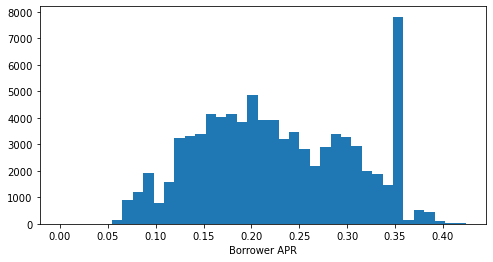

In [24]:
# Set color for all univariate plots
colors = sns.color_palette('Paired')

# Create 40 evenly spaced bins for Borrower APR from zero to the maximum value
bins = np.linspace(0, loan_df.BorrowerAPR.max(), 40)

plt.figure(figsize=(8, 4))
plt.hist(data=loan_df, x='BorrowerAPR', bins=bins, color = colors[1]);
plt.xticks(np.arange(0, 0.45, 0.05))
plt.xlabel('Borrower APR');

#### Observations
>-  Borrower APR appears to follow a multimodal distribution, with peaks around 0.09, 0.2 and 0.3 respectively. A very sharp peak can also be seen between 0.35 and 0.36. In general, only few listings have borrower APR greater than 0.4.

Next, we will explore the debt-to-income ratio feature for some quick insights into possible borrower preferences.
  
#### Question Two: How are the values for Debt-to-income ratio distributed, are borrowers taking more debt than their income could possibly handle?
#### Visualization

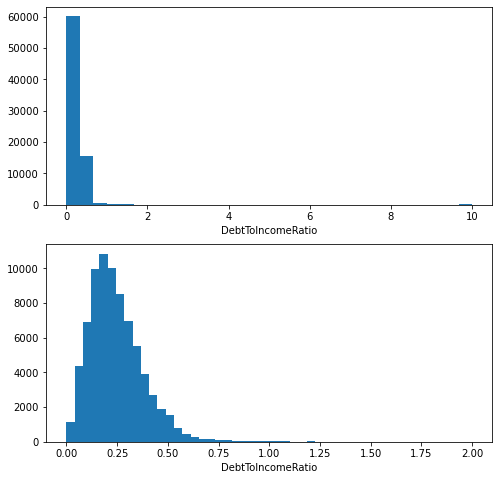

In [25]:
plt.figure(figsize=(8, 8))

# Plot a general distribution with 30 bins.
plt.subplot(2,1,1)
plt.hist(data=loan_df, x='DebtToIncomeRatio', bins=30, color = colors[1])
plt.xlabel('DebtToIncomeRatio');

# Zoom into the distribution and examine closely, with evenly spaced bins
bins = np.linspace(0, 2, 50)
plt.subplot(2,1,2)
plt.hist(data=loan_df, x='DebtToIncomeRatio', bins=bins, color = colors[1])
plt.xlabel('DebtToIncomeRatio');

#### Observations
>- The distribution of Debt-to-Income ratio is right skewed. Most borrowers seem to prefer taking loans within their means. This can be seen as the bulk of values are distributed between 0 and 1. 
>- Zooming into this distribution, we see a peak around 0.20 and 0.25. This may suggest that borrowers prefer to maintain debt ratios of quarter to one-fifths of their income. This seems like a wise way to live within their means.

Since we have just gathered a few insights from the distribution of debt-to-income ratios, it would be great to see how the actual monthly incomes of borrowers are distributed too. To gather this insight, we will need to explore the **StatedMonthlyIncome** feature:

#### Question Three: How are monthly incomes distributed among borrowers on the platform?
#### Visualization

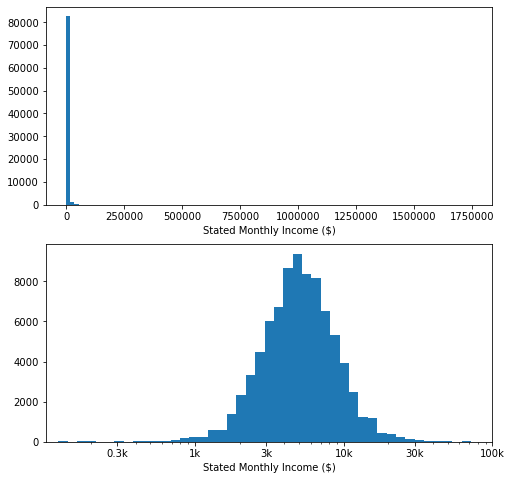

In [26]:
plt.figure(figsize=(8, 8))

# Plot a standard scaled plot
plt.subplot(2, 1, 1)
plt.ticklabel_format(style='plain')
plt.hist(data=loan_df, x='StatedMonthlyIncome', bins=100, color = colors[1])
plt.xlabel('Stated Monthly Income ($)');

# Make a transformed plot to account for the severe right skew
plt.subplot(2, 1, 2)
# Transform the highest income value to log scale
bins_max = np.log10(loan_df.StatedMonthlyIncome.max())

# Create 100 evenly transformed bins to hold data groups
bins_trans = 10 ** np.linspace(0, bins_max, 100)
plt.hist(data=loan_df, x='StatedMonthlyIncome', bins=bins_trans, color = colors[1])

# Convert x axis to logarithmic scale
plt.xscale('log')

# Create evenly spaced x-axis tick marks from 300 - 100,000 USD
plt.xticks([3e2, 1e3, 3e3, 1e4, 3e4, 1e5], 
           ['0.3k', '1k', '3k', '10k', '30k', '100k']);

plt.xlim(1e2, 1e5)
plt.xlabel('Stated Monthly Income ($)');

#### Observations
>- The distribution of stated monthly income is severely right skewed, due to the presence of high earners among the mix. The first plot shows that most borrower incomes are below 250,000 dollars. 
>- Accounting for the large variation in income with a log scale, then zooming into the 0 and 100,000 range, leads us to find that many borrowers earn between 1,000 to 30,000 US dollars monthly, with a peak around 5,000 US dollars.

Next, we will explore the actual loan amounts that borrowers are applying for. This information can be found in the **LoanOriginalAmount** column.

#### Question Four: What is the distribution of loan amounts requested by borrowers?
#### Visualization

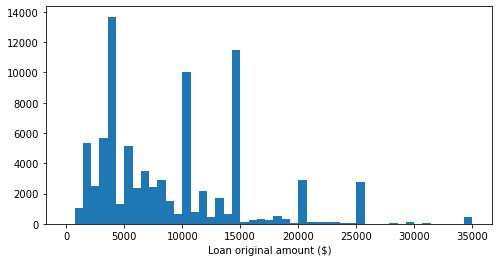

In [27]:
plt.figure(figsize=(8, 4))
bins = np.linspace(0, loan_df.LoanOriginalAmount.max(), 50)
plt.hist(data=loan_df, x='LoanOriginalAmount', bins=bins, color = colors[1])
plt.xlabel('Loan original amount ($)');

#### Observations
>- The loan amounts show interesting spikes around multiples of 5,000. This **may** suggest that most borrowers request loans in mutiples of 5,000 for convenience of using a round figure. It is also clear that the majority of the loans do not exceed 15,000 US dollars.

As a final step in the univariate exploration of the numeric columns, we will take a look at the **Term** feature. The loan term is a discrete quantitative variable that specifies the lenght of the loan period in months. It is important to consider this discrete nature when building our visualization.

#### Question Five: How are the lenght of loans distributed in the dataset. What loan terms are most commonly requested by borrowers?
#### Visualization

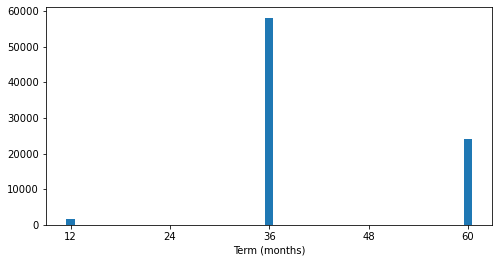

In [28]:
# Term is a discrete quantitative variable
# Set up bins centered on the term values. Then substract 0.5 to remove the extra bin at the end
bins = np.arange(loan_df.Term.min(), loan_df.Term.max()+1.5) - 0.5

# Plot histogram with the centred bins
plt.figure(figsize=(8, 4))
plt.hist(data = loan_df, x='Term', bins=bins, color = colors[1])
# create ticks spaced at 12 month intervals
plt.xticks(np.arange(12, 61, 12))
plt.xlabel('Term (months)');

#### Observations
>- There seems to be only three unique loan terms available in the dataset: 12 months, 36 months and 60 months. This corresponds to loan lengths of 1 year, 2 years and 5 years respectively. This may suggest that the prosper platform only provides lenders with three terms for loan repayment, probably depending on the size of the loan. A quick search on [this page](https://www.prosper.com/loans/loan-types/?ref=driverlayer.com) of prosper website also yeilds supporting results.
>- The majority of borrowers apply for three-year loans, while others apply for five-year loans. Short-term loans of one year are the least requested.

Now, we will turn our attention towards exploring the categorical and datetime columns. We will start by exploring the date the loan listings were created, i.e., the **ListingCreationDate** feature. It would be great to know the number of listings by year, month, day and hour.

#### Question Six: What is the pattern of distribution of loan listings by year, month, day, and hour?
>**Note:** _To answer this question, we will need to explore ListingCreationDate in granular details. Although we are dealing with time series information, it is better to refrain from a univariate line plot. We are only exploring the number of listings per year, month, day and hour. A line plot might create an illusion of continuity, when in fact the information was pulled from these time units, accross different years._
 
#### Visualization

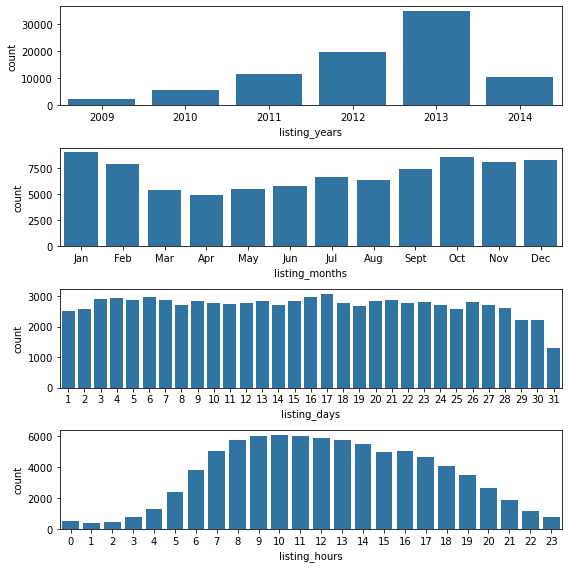

In [29]:
# Store the listing date breakdowns and their plotting indices in a dictionary
listing_breakdown = {
    'listing_years' : [1, loan_df.ListingCreationDate.dt.year],
    'listing_months' : [2, loan_df.ListingCreationDate.dt.month],
    'listing_days' : [3, loan_df.ListingCreationDate.dt.day],
    'listing_hours' : [4, loan_df.ListingCreationDate.dt.hour],
}

# Plot the required information using a for loop
fig = plt.figure(figsize=(8, 8))

for key, value in listing_breakdown.items():
    plt.subplot(4, 1, value[0])
    sns.countplot(x= value[1], color = colors[1])
    # Replace the month's integer values (0 - 12) with descriptive strings
    if (key == 'listing_months'):
        plt.xticks(np.arange(12), 
                   ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
    plt.xlabel(key)
plt.tight_layout();

#### Observations
>- The number of listings have increased over the years, **probably** due to the increasing awareness of the prosper platform among borrowers. The fact that the loan data was last updated on 11th March, 2014 may explain the low number of 2014 listings, since the data was collected before the year had elapsed.
>- The pattern of loan requests per day does not differ by much. However, loan requests seem uncommon on the last few days of the month.
>- Loan requests appear to be more common in the first two months and last few months of the year: January to February, and September to December respectively.
>- Majority of loan requests are placed between 5am and 9pm. This is quite intuitive, considering that most people are usually asleep outside these hours.

Next, we will turn our attention to the Prosper ratings (another key feature of interest), income range, and the employment status of the borrowers, in a bid to understand how these variables are distributed. 

#### Question Seven: How are Prosper ratings, Income range and Employment status distributed among listings in the dataset?

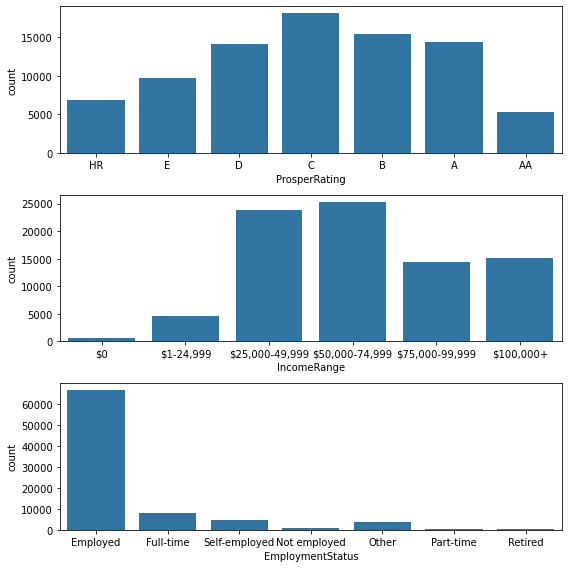

In [30]:
columns = ['ProsperRating', 'IncomeRange', 'EmploymentStatus']

fig, ax = plt.subplots(nrows=3, figsize=(8, 8))

for col, index in zip(columns, range(3)):
    sns.countplot(data=loan_df, x=loan_df[col],color = colors[1], ax= ax[index])
plt.tight_layout();

#### Observations
>- The distribution of prosper ratings is unimodal, with the most common rating belonging to the central grade represented (**C**). Listings with very high prosper ratings (**AA**) are the least common.
>- Income range shows a left skew. Most of the listings pertain to borrowers earning between 25,000 and 74,999 US dollars per annum. Only a few proportion of the listings had borrowers that earned below 25,000 US dollars per annum.
>- The pattern in employment status shows that the majority of listings are created by employed people. This is quite intuitive, considering how difficult it would be to obtain a loan without a job.

#### Question Eight: How are the following variables distributed: IsBorrowerHomeowner, IncomeVerifiable and ListingCategory?
#### Visualization

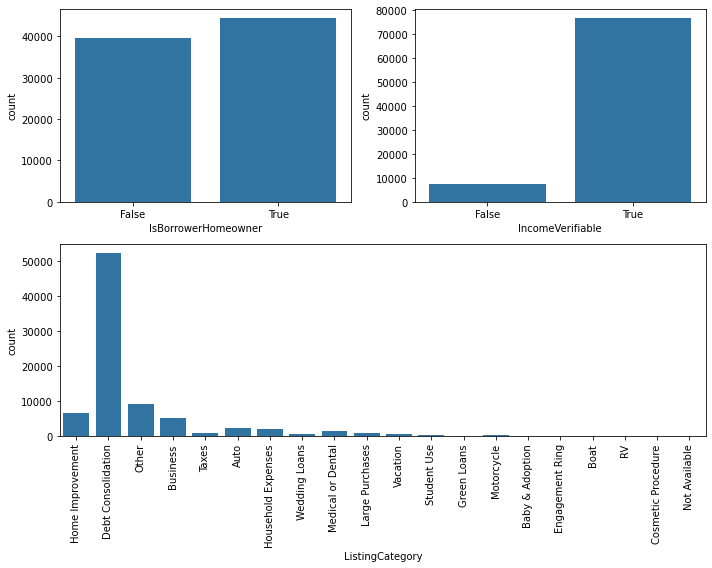

In [31]:
fig = plt.figure(figsize=(10, 8))
# IsBorrowerHomeowner
plt.subplot(2,2,1)
sns.countplot(data=loan_df, x='IsBorrowerHomeowner', color = colors[1])

# IsBorrowerHomeowner
plt.subplot(2,2,2)
sns.countplot(data=loan_df, x='IncomeVerifiable', color = colors[1])

# ListingCategory
# Make last axes occupy the two subplots in the second row
plt.subplot(2,1,2)
sns.countplot(data=loan_df, x='ListingCategory', color = colors[1])
plt.xticks(rotation=90)
plt.tight_layout();

#### Observations
>- Homeowners are more commonly found requesting loans on the platform than their counterparts.
>- The majority of borrowers on the platform have verifiable means of income. This is expected: Requesting a loan without a verifiable source of income may not yeild the most desired results.
>- Shockingly, it appears that people seek loans from the platform, in order to pay existing loans. The proportion of these individuals greatly exceeds those that seek loans for many expected reasons like Business, Home improvement, Auto related and Medical reasons.

Let's take a look at the status of the loans present in the dataset, an information present in the **LoanStatus** column.

#### Question Nine: How does loan status vary across listings in the dataset. Can we tell if borrowers are paying off their loans?
#### Visualizations

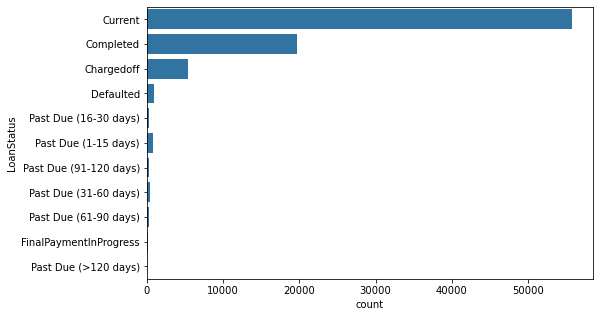

In [32]:
plt.figure(figsize=(8, 5))
sns.countplot(data=loan_df, y='LoanStatus', color=colors[1]);

#### Observations
>- The dataset is majorly populated with current loans (over 50,000 records). Completed loans also comprise a notable proportion of the listings (about 20,000 records). Although defaulting loans are few, about 5,000 records are charged-off loans, hinting losses for those who had invested.
>- Since the greatest proportion of the listings are current loans, it will be hard to tell at the moment if borrowers have been paying off their loans.

Finally, we will explore the **BorrowerState** column, then try to identify the states where the highest number of listings have originated from.

#### Question Ten: Which states have the highest number of listings created by borrowers?
#### Visualizations

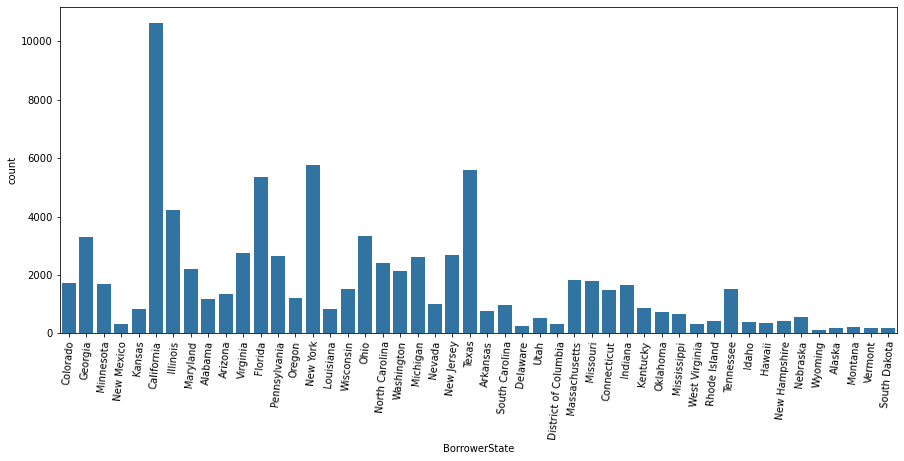

In [33]:
plt.figure(figsize=(15, 6))
sns.countplot(data=loan_df, x='BorrowerState', color = colors[1])
# Rotate the x-ticks for reading ease
plt.xticks(rotation= 85);

#### Observations
>- California has the highest number of borrowers on the listings, with over 10,000 loan listings originating from borrowers in the state. Borrowers from New York, Texas, Florida, and Illinois have also contributed over 4000 listings each.
   
### B. Bivariate Explorations
---
Now, the idea is to find interesting relationships that show the influence of one variable on the other, preferably on our target variables: Borrower APR and Prosper rating.

Similar to how descriptive statistics was used to get an intuition of how numeric values are distributed during our univariate analysis. We will start here by exploring pairwise correlations between our numeric variables. This will provide a clearer intuition on how to proceed further with our analysis.

#### Question One: Do any of our numeric variables (DebtToIncomeRatio, StatedMonthlyIncome, LoanOriginalAmount, BorrowerAPR and Term) show notable correlations or relationships?
>- To visualize these relationships at an overview level, we will use the seaborn PairGrid and Heatmap.

#### Visualizations

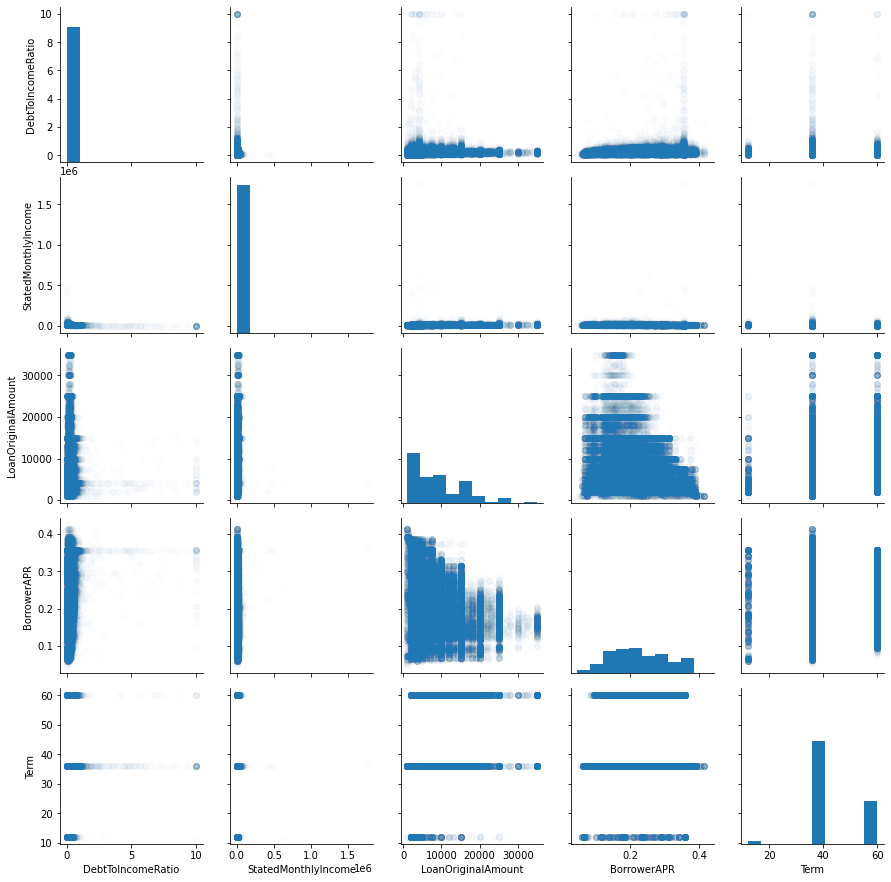

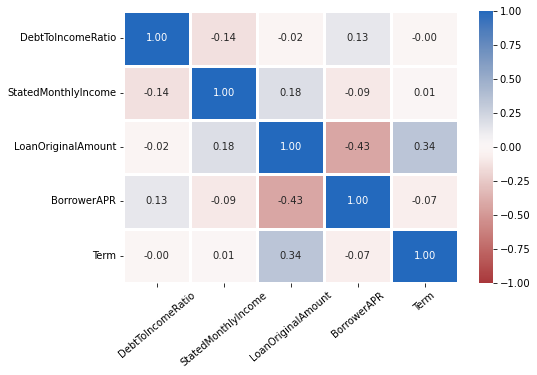

In [34]:
# Store numeric column names in a list
numeric_cols = ['DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'BorrowerAPR', 'Term']

# Create a scatterplot of each numeric variable against the other
fig = sns.PairGrid(loan_df[numeric_cols])
fig.map_diag(plt.hist, color = colors[1])
fig.map_offdiag(plt.scatter,color = colors[1], alpha=0.01);

# Visualize the correlation between the numeric variables with a heatmap
plt.figure(figsize= (7.5, 5))
sns.heatmap(data=loan_df[numeric_cols].corr(), annot=True, fmt='.2f', 
            cmap='vlag_r', vmin=-1, vmax=1, linewidth=3)
plt.xticks(rotation=40);

#### Observations
>- There appears to be a moderate negative correlation (-0.43) between loan original amount and Borrower APR. This implies that larger loans may attract lesser annual percentage rates than smaller loans.
>- A moderately positive correlation (0.34) can also be seen between the loan term and LoanOriginalAmount. This makes some sense, since borrowers may need longer terms to fully repay higher loan amounts.
>- There are no notable relationships between the other numeric variables at the moment.

Since BorrowerAPR is one of our target variables, it would be interesting to further visualize its relationship with LoanOriginalAmount clearly. 

#### Additional exploration (LoanOriginalAmount and BorrowerAPR)
To avoid overplotting, we will take a sample of 2000 records from the `loan_df` dataframe, then apply some opacity and jitter settings to view the relationship better.

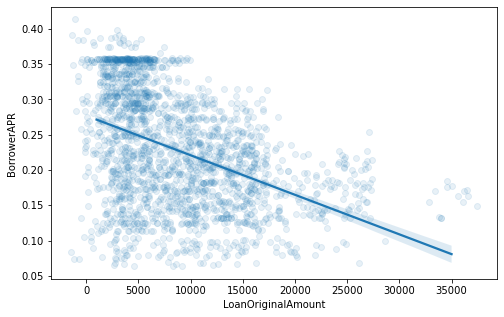

In [35]:
plt.figure(figsize=(8, 5))
sns.regplot(data=loan_df.sample(2000, random_state=1), x='LoanOriginalAmount', y='BorrowerAPR', 
            x_jitter=2500, color = colors[1], scatter_kws={'alpha': 0.1});

#### Additional Observations
>- The clear visualization and regression line further buttresses the negative relationship between LoanOriginalAmount and BorrowerAPR. Higher loan amounts are more likely to come with lower interest rates than smaller alternatives.
>- According to a [supporting article by Zillow home loans](https://www.zillowhomeloans.com/resources/factors-influencing-interest-rate/), smaller loan sizes often have slightly higher interest rates to cover the fixed costs lenders pay to obtain and manage the loan during repayment. Whereas, loans on the higher end of the conforming loan range will sometimes have a slightly lower interest rate because they are a little more profitable than smaller loans. 

#### Additional exploration (LoanOriginalAmount and loan Term)
We will also employ dataframe sampling, plot jittering and opacity settings to visualize this relationship clearer.

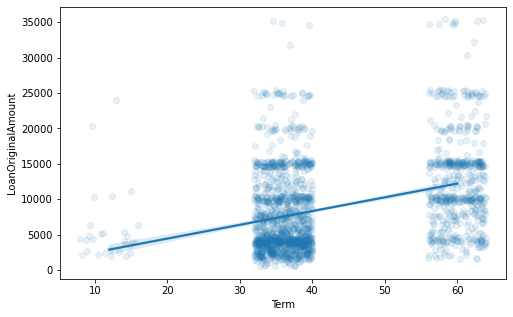

In [36]:
plt.figure(figsize=(8, 5))
sns.regplot(data=loan_df.sample(2000, random_state=1), x='Term', y='LoanOriginalAmount', 
            x_jitter=4, color= colors[1], y_jitter=500,scatter_kws={'alpha': 0.1});

#### Additional Observations
>- While this relationship requires a keener eye for detail to identify, the darker areas of the plot may give us some insights into where most of the data points are concentrated. The loan original amount clearly increases with loan term, however, to a smaller degree.
>- Long term loans are usually taken to help business needs, like buying of machinery, or any personal need, like owning a house. Perhaps, capital projects like this may have an influence on the loan amounts, hence affecting the term. _We will note this for later, when we try to visualize the relationship between ListingCategory and loan term_.

Next, we will explore the bivariate relationships between our numeric and categorical variables.
#### Question Two: Is there any relationship between numerical features such as BorrowerAPR, StatedMonthlyIncome, LoanOriginalAmount, DebtToIncomeRatio and categorical features like Term, ProsperRating, and IncomeRange?
>- _**Note:** Since there are three discrete values for term (12, 36 and 60), it would be easier to treat the feature as an ordinal categorical variable, rather than a numeric one, moving forward. This will also make it easier to explore its influence on other features in detail._
  
#### Visualization
To answer this question, we will create a seaborn PairGrid object, then map the resulting grids to several boxplots that compare the numeric and categorical variables. Based on our observations during univariate analysis, we will limit the axis of StatedMonthlyIncome and DebtToIncomeRatio to 0-3000, and 0-1 respectively.

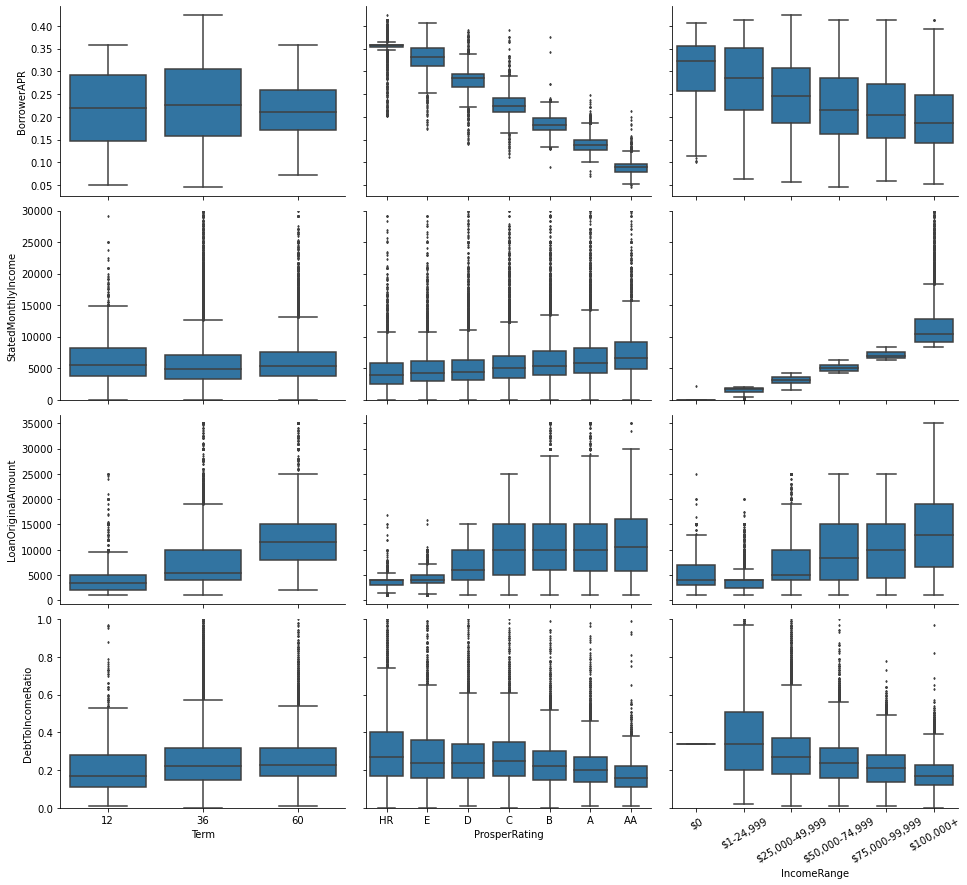

In [37]:
# Create a list of columns to plot on each pairgrid axis
x_cols = ['Term','ProsperRating', 'IncomeRange']
y_cols = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount','DebtToIncomeRatio']


# Create a custom PairGrid with column lists specified
fig = sns.PairGrid(data = loan_df, y_vars = y_cols, x_vars = x_cols, height = 3, aspect=1.5)
fig.map(sns.boxplot, color=colors[1], fliersize=1.5)

# Limit the y axis of stated monthly income to 0 - 30000
for ax in fig.axes[1, :]:
    ax.set_ylim(0, 30000)

# Limit the y axis of debt income ratio to 0 - 1
for ax in fig.axes[3, :]:
    ax.set_ylim(0, 1)

plt.xticks(rotation=30);

#### Observations
>- There is an inverse relationship between Borrower APR and Prosper rating. Borrower APR also reduces as the income range of borrowers increase. This implies that high income earners with higher ratings enjoy lower interest rates on the platform.
>- The relationships observed with stated monthly income also supports our observation. There is a positive relationship between StatedMonthlyIncome and ProsperRating, which emphasizes the collective effect that high incomes and high prosper ratings may have on lowering BorrowerAPR. The positive relationship between StatedMonthlyIncome and IncomeRange is easily intuitive.
>- Treating term as a categorical variable, it is clear to see the upward trend in loan term as the LoanOriginalAmount increases, confirming the positive correlation we observed earlier. People with higher prosper ratings also seem to enjoy larger loans, when compared to those with lower ratings. LoanOriginalAmount also increases with income range, suggesting that high earners may prefer to go for bigger loans.
>- The relationship between DebtToIncomeRatio and loan term **may** reflect some borrower sentiments when taking loans. It seems that long term loans encourage borrowers to increase their debt ratio, hoping to leverage the opportunity presented by the long payback times. High earners and individuals with higher prosper ratings appear to maintain lower debt to income ratios.

Next, we will explore the relationship between **EmploymentStatus** and each of the numerical variables compared above.
#### Question Three: What is the association between Employment status and the numerical variables:  BorrowerAPR, StatedMonthlyIncome, LoanOriginalAmount, DebtToIncomeRatio?
#### Visualization

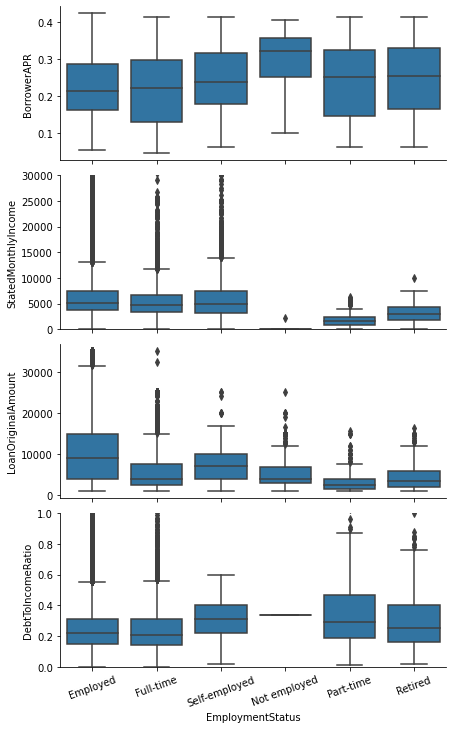

In [38]:
# Filter out entries where employment status is 'other'
employment_filter = loan_df.query('EmploymentStatus != "Other"')

fig = sns.PairGrid(data=employment_filter, y_vars=y_cols, x_vars='EmploymentStatus', aspect=2.5)
fig.map(sns.boxplot, color=colors[1])

# Limit the y axis of StatedMonthlyIncome to 0 - 30000
fig.axes[1][0].set_ylim(0, 30000)
# Limit the y axis of DebtToIncome ratio to 0 - 1
fig.axes[3][0].set_ylim(0, 1)
plt.xticks(rotation=20);

#### Observations
>-  As expected, employed, full-time employed, and self-employed borrowers have higher monthly incomes, obtain higher loan amounts, and enjoy lower Borrower APRs than part-time, retired, and unemployed borrowers.
>- Employed and full-time borrowers have lower debt to income ratios compared to part-time, retired, and unemployed borrowers. This trend is easy to understand, considering the differences in income across these groups.
>- The high debt to income ratio observed among self-employed borrowers **may** hint at the propensity of self employed individuals to take higher loan amounts, with the aim of expanding or starting a business idea.

The last observation leads us to explore further, **for what purposes do people apply for the largest loans?**. We will attempt to answer this by evaluating the relationship between ListingCategory and LoanOriginalAmount.

#### Question Four: What is the relationship between ListingCategory and LoanOriginalAmount. For what reasons do people apply for the largest loans on average?

#### Visualization
Since loan amounts may vary widely within each listing category, we will use the median loan amount as the measure of our average value, then visualize the relationship with a bar chart. In addition, a violinplot will be used to explore the variations in loan original amount within each listing category:

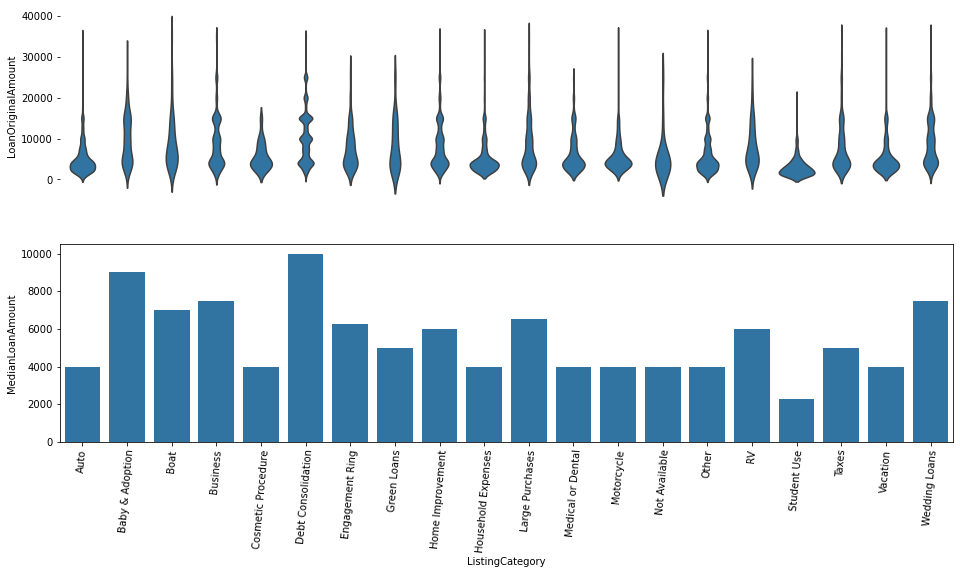

In [39]:
# Compute the median loan amount by listing category
table = loan_df.groupby('ListingCategory')['LoanOriginalAmount'].median()
table = table.reset_index(name='MedianLoanAmount')

# Create Violinplot visual
plt.figure(figsize=(16, 8))
plt.subplot(2,1,1)
sns.violinplot(data=loan_df.sort_values(by='ListingCategory'), x='ListingCategory', y='LoanOriginalAmount', inner=None,
               color=colors[1])
# Remove violinplot ticks, labels and spines
plt.xticks([])
plt.xlabel('')
sns.despine(left=True, bottom=True)

# Create barplot
plt.subplot(2,1,2)
sns.barplot(data=table, x='ListingCategory', y='MedianLoanAmount', ci=None, color=colors[1])
plt.xticks(rotation= 85);

#### Observations
>- On average, people apply for the largest loans for Debt consolidation, Baby & adoption, Business, Weddings, and for the purposes of buying luxury items like boats. Students apply for the least sized loans on average. An interesting pattern here is that people appear to be taking large loans for lavish and **probably the wrong reasons subjectively**.

Next, we will look at this pattern, with regards to the states. From what states do people appear to be taking the largest loans on average?

#### Question Five: What is the relationship between BorrowerState and LoanOriginalAmount. From what states do people appear to be taking the largest loans on average?

#### Visualization
We will follow the same approach as above. However, this time, we will use a boxplot to visualize the variations in Loan original amount within each state.

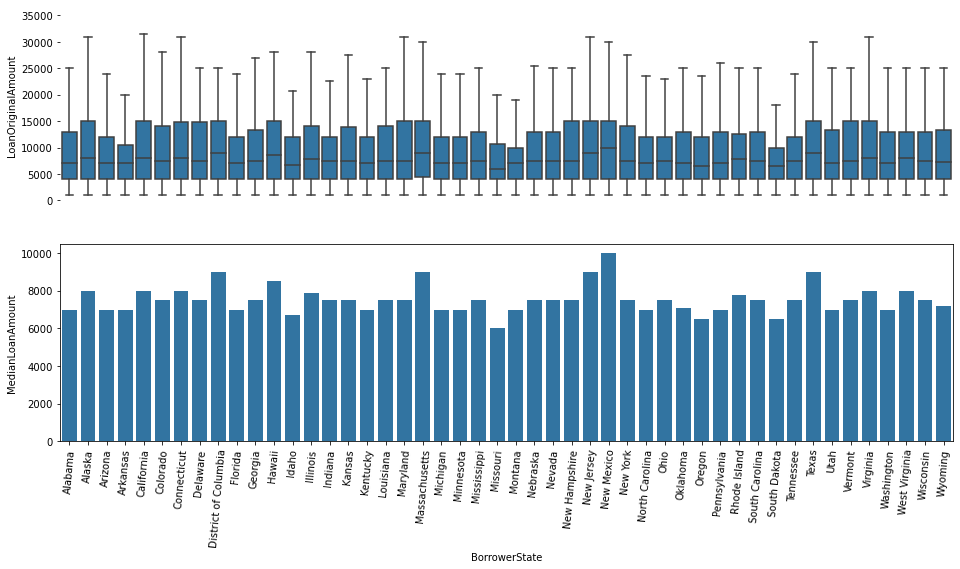

In [40]:
# Compute the median loan amount by listing category
table = loan_df.groupby('BorrowerState')['LoanOriginalAmount'].median()
table = table.reset_index(name='MedianLoanAmount')

# Create boxplot visual
plt.figure(figsize=(16, 8))
plt.subplot(2,1,1)
sns.boxplot(data=loan_df.sort_values(by='BorrowerState'), x='BorrowerState', y='LoanOriginalAmount', 
            fliersize=0, color=colors[1])
# Remove violinplot ticks, labels and spines
plt.xticks([])
plt.xlabel('')
sns.despine(left=True, bottom=True)

# Create barplot
plt.subplot(2,1,2)
sns.barplot(data=table, x='BorrowerState', y='MedianLoanAmount', ci=None, color=colors[1])
plt.xticks(rotation= 85);

#### Observations
>- Higher loans on the listings seem to originate from New Mexico, New Jersey, Texas, District of Columbia, Massachussetts, and Hawai, when compared to the other states within the US.
  
lets further explore the relationships between different categorical variables in our dataset, especially the ProsperRating, IncomeRange, and EmploymentStatus. We will consider how these variables may interact with one another, in a bid to answer the following questions:

#### Question Six:
>-  Does IncomeRange correlate with ProsperRating in the same way as StatedMonthlyIncome?
>- Is home ownership correlated with higher Prosper ratings?
>- Is there an observable relationship between EmploymentStatus and ProsperRating?

#### Visualization
We can use a clustered bar chart to show the relationship between two categorical variables. However, we may need to perform additional processing on one of the variables to make it display as a quantitative value along the y-axis of our plot. An approach could be computing the frequency of the second variable. In our case, we will compute the proportion (percentage) of the second variable instead. This ensures that all our variables are compared across a standard scale of 100%. Although we may lose information on the absolute frequency of each variable on the x-axis, we will gain the advantage of being able to compare the relative frequency of the y-axis variable within the x-axis.

To perform these actions, we will define two functions. The first function `compute_proportions()` will compute the proportion of the y-axis variable within the x-axis variable, while the second function, `plot_proportions()` will plot a column bar chart, based on the computed proportions.

In [41]:
def compute_proportions(df, group_col, proportion_col):
    """
        Computes the proportions of proportion_col within group_col
        Params:
            :df (dataframe): dataframe of interest
            :group_col (string): name of grouping column
            :proportion_col (string): name of column to compute proportions for
        Output:
            returns a dataframe with relative frequencies of proportion_col within group_col
    """
    # First group dataframe by group_col and proportion_col
    result = df.groupby([group_col, proportion_col]).agg({proportion_col: 'size'})
    
    # Compute the proportions of proportion_col within group_col
    result = result.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
    
    # Rename proportion results and reset dataframe index
    result.rename(columns={proportion_col: 'percent_of_total'}, inplace=True)
    result = result.reset_index()
    return result

def plot_proportions(df, group_col, proportion_col, cmap):
    """ Creates a clustered bar chart  of prop_col and group_col"""
    # Call the compute proportion function
    table = compute_proportions(df, group_col, proportion_col)
    # Create Column bar chart
    sns.barplot(data=table, x= group_col, y= 'percent_of_total', hue=proportion_col, palette=cmap)
    plt.legend(bbox_to_anchor=(1,1), loc="upper left", title=proportion_col)

Now that our functions are defined, we can build visualizations to answer our questions:

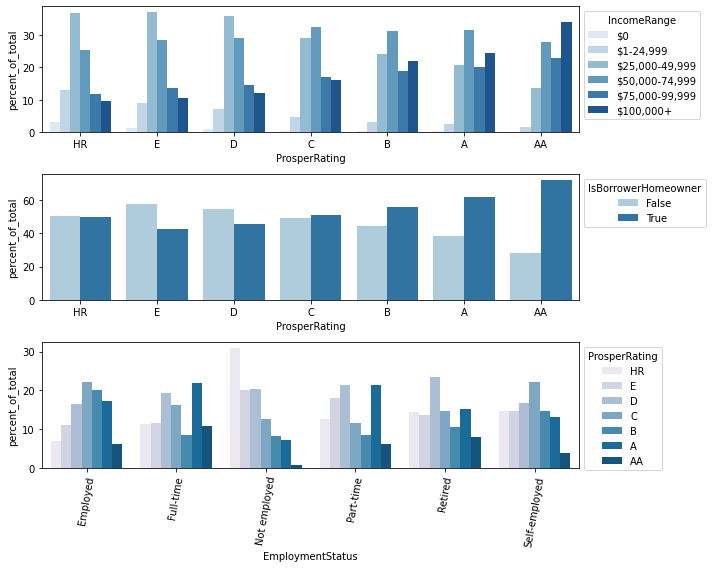

In [42]:
plt.figure(figsize=(10,8))

# ProsperRating vs IncomeRange
plt.subplot(3,1,1)
plot_proportions(loan_df, 'ProsperRating', 'IncomeRange', 'Blues')

# Prosper Rating vs IsBorrowerHomeowner
plt.subplot(3,1,2)
plot_proportions(loan_df, 'ProsperRating', 'IsBorrowerHomeowner', 'Paired')

# EmploymentStatus vs ProsperRating
plt.subplot(3,1,3)
plot_proportions(employment_filter, 'EmploymentStatus', 'ProsperRating', 'PuBu')

plt.xticks(rotation=80)
plt.tight_layout();

#### Observations
>- As prosper rating increases, so does the proportion of high income earners. High income earners are more concentrated at the higher end of the prosper rating spectrum, and vice versa. This further supports our earlier observations with ProsperRating and StatedMonthlyIncome.
>- Home ownership also correlates positively with Prosper ratings. The top prosper ratings (**AA**, **A** and **B**) have more proportions of homeowners, while the lower prosper ratings have lesser proportions of homeowners. This makes sense, since property like a home can serve as collateral to secure loans. It also gives investors an incentive to view a borrowers loan request as less risky, hence, the higher prosper rating.
>- The lowest Prosper rating, **HR**, is dominant among unemployed borrowers.

As a final step of our bivariate analysis, we will explore the relationship between ListingCategory and the loan term. We may probably identify some specific types of loans that span over longer periods than the others.

#### Question Seven: What is the association between ListingCategory and loan Term. Are there specific loan types that span over longer periods than the others?
#### Visualization

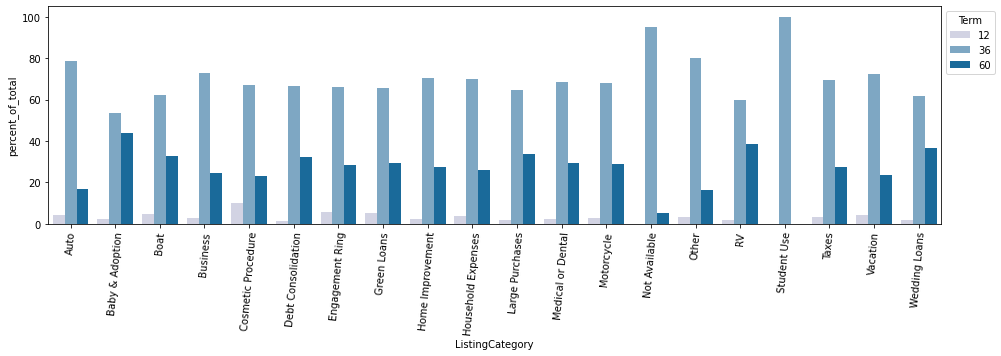

In [43]:
plt.figure(figsize=(16,4))
plot_proportions(loan_df, 'ListingCategory', 'Term', 'PuBu')
plt.xticks(rotation= 85);

#### Observations
>- It is difficult to tell if particular loan types span longer years than others. However, the dominance of 36-month loans cannot be understated. It seems that most borrowers prefer to take 36-month loans, irrespective of their use case or needs.

### Key Takeaways from Bivariate Analysis
---
The bivariate exploration of the Prosper loan data has led us to identify features that show some association with our key variables of interest:
- **BorrowerAPR** shows an inverse relationship with the Prosper rating and loan original amount.
- **ProsperRating** shows inverse relationships with the debt-to-income ratio, and positive relationships with the income range, stated monthly income, income verifiability and home-ownership status of borrowers.
- There is also some association between BorrowerAPR, ProsperRating and loan term. However, the nature of this relationship is not very clear.

Through multivariate analysis, we will explore the interactions between these identified variables in further detail:
### C. Multivariate Explorations
---

First, lets explore the relationship between the amount of loan collected, Borrower APR and home-ownership status.
#### Question One: What is the relationship between LoanOriginalAmount, ProsperRating and IsBorrowerHomeowner. Do homeowners enjoy higher loans accross board than their counterparts?
#### Visualization

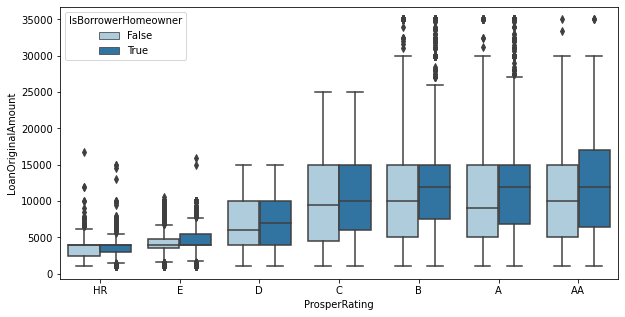

In [44]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=loan_df, x='ProsperRating', y='LoanOriginalAmount', hue='IsBorrowerHomeowner', palette='Paired');

#### Observations
>- Across all prosper ratings, homeowners indeed obtain higher loan amounts on average than their counterparts. In addition to other factors, having a home is a good consideration when higher loan amounts are involved.
  
Next, let's explore the nature of the interactions between BorrowerAPR, LoanOriginalAmount, and ProsperRating.
#### Question Two: What is the nature of the combined interaction between BorrowerAPR, LoanOriginalAmount, and ProsperRating?
#### Visualization
To avoid overplotting and make the interactions clear, if any, we will sample 500 records from our dataframe

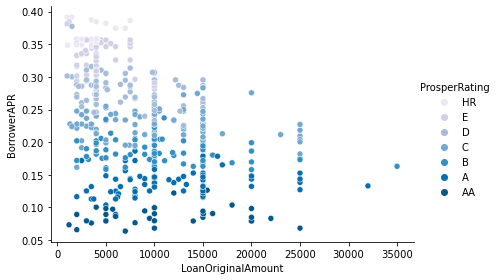

In [45]:
# Visualize interactions with a seaborn relplot
sns.relplot(data=loan_df.sample(500, random_state=1), y='BorrowerAPR', x='LoanOriginalAmount', 
            hue='ProsperRating', palette='PuBu', height=4, aspect=1.5);

#### Observations
>- The relationship between the three variables is clear to see here. Borrowers with low prosper ratings take smaller loans at higher percentage rates, while those with higher prosper ratings enjoy higher loan amounts at lower rates.

Since we are already aware of the positive correlation between ProsperRating and IncomeRange, we will explore the relationship above from the income perspective. This time, we will use the income range as the third variable, in place of the prosper rating.

#### Question Three: What is the nature of the combined interaction between BorrowerAPR, LoanOriginalAmount, and IncomeRange?
#### Visualization
This time we will us a seaborn regression plot within a FacetGrid to visualize the interactions:

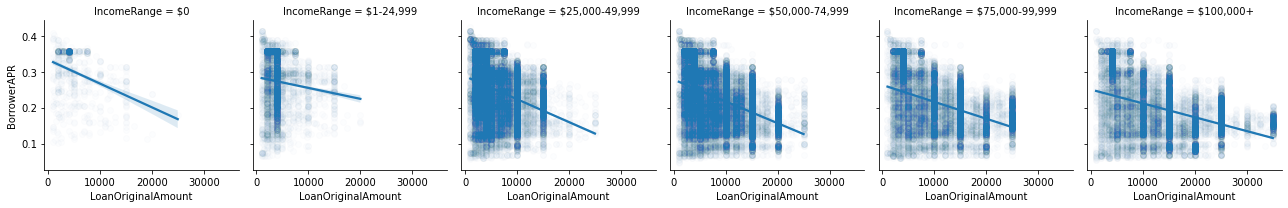

In [46]:
fig = sns.FacetGrid(data=loan_df, col='IncomeRange')
fig.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', color=colors[1], scatter_kws={'alpha': 0.01});

#### Observations
>- The relationship here is similar to the one we observed earlier with prosper ratings. The high income earners enjoy larger loans at lower APRs than the low income earners. This is evident from the spread in blue heat regions on our plot from top-left to bottom-right.
>- Another interesting pattern can be seen here, especially from the slope of the regression line. The slope appears to  become less steep as income increases, probably indicating that the effect of income on BorrowerAPR gradually diminishes as income keeps rising: **could there be a lurking variable somewhere?**

The slope of the regression line leads us to explore the relationship between BorrowerAPR, LoanOriginalAmount and prosperRating again, with the same Seaborn regression plot and FacetGrid.

#### Question Four: Let's take a look at BorrowerAPR, LoanOriginalAmount and prosperRating again. Is it possible that there is a change at some point, where higher ProsperRatings may show no further decrease in BorrowerAPR?
#### Visualization

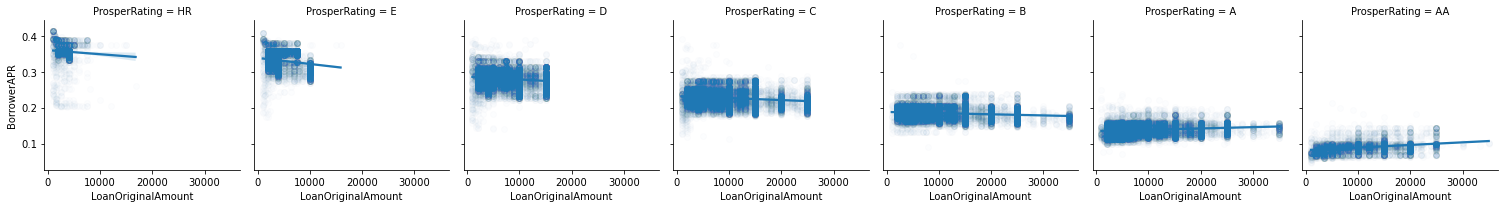

In [47]:
fig = sns.FacetGrid(data=loan_df, col='ProsperRating')
fig.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', color=colors[1], scatter_kws={'alpha': 0.01});

#### Observation
>- Surprisingly, not only do we see that the reducing effect of ProsperRating on BorrowerAPR gradually diminishes, we also notice that the trend starts to reverse at the highest prosper rating levels. At some point, Borrower APR starts to rise despite increasing ProsperRating. This certainly leads to more questions. Could this be related to the fact that highly rated borrowers tend to borrow huge sums of money, and the increased APR may serve as a disincentive from 'overborrowing'?

In a bid to understand why borrower APR may increase among individuals with high prosper ratings, we can explore from various angles. Our next set of multivariate explorations will explore variables such as loan Term, ProsperRating, LoanOriginalAmount and DebtToIncome ratio for some answers.

#### Question Five: What is the relationship between ProsperRating, LoanOriginalAmount, loan Term, and DebtToIncomeRatio. Do highly-rated borrowers tend to take huge loans as the loan term increases, and does this influence their debt-to-income ratio and Borrower APR in any way?
#### Visualization
To start with, let's visualize the trend in loan amounts with loan term, we will use a pointplot, then facet our observations by prosper rating:

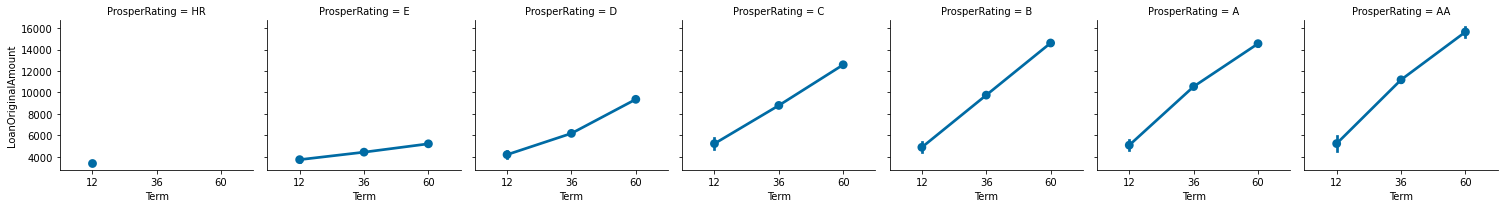

In [48]:
fig = sns.FacetGrid(data=loan_df, col='ProsperRating')
fig.map(sns.pointplot, 'Term', 'LoanOriginalAmount', order=None);

**Note:** It seems that individuals with high prosper ratings tend to greatly increase their loan amounts once they have longer payback periods. This can be seen from the rising slope of the lines from the first to the last facet. Next, we look at how this affects the Debt-to-income ratio, using the same kind of faceted pointplots:

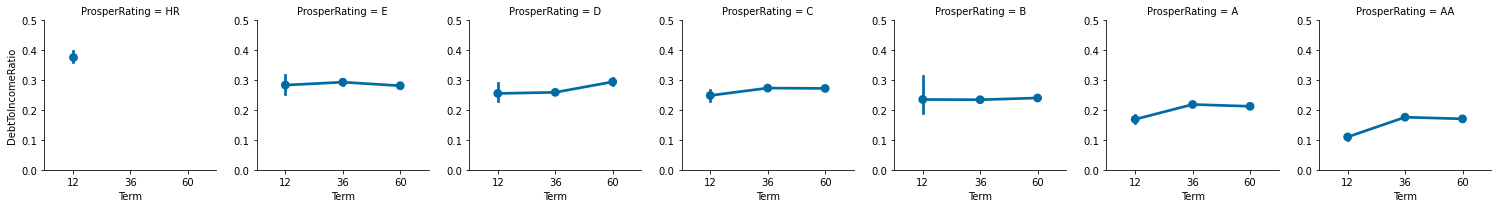

In [49]:
fig = sns.FacetGrid(data=loan_df, col='ProsperRating', sharey=False)
fig.map(sns.pointplot, 'Term', 'DebtToIncomeRatio', order=None)
# Limit y-axis for all facets from 0 to 0.5
for ax in fig.axes:
    for i in range(7):
        ax[i].set_ylim(0, 0.5)

**Note:** Despite the fact that debt-to-income ratio decreases with posper ratings, the slope of the connecting plot lines tell us an interesting story: The top rated borrowers (**A** and **AA**) notably increase their debt-to-income ratios when higher payback periods are involved, especially for 36-term (3-year) loans. 

Let's use these notes to create three simple and informative pointplots that shows and connects the trends we have observed between LoanOriginalAmount, DebtToIncomeRatio, BorrowerAPR and ProsperRating altogether.

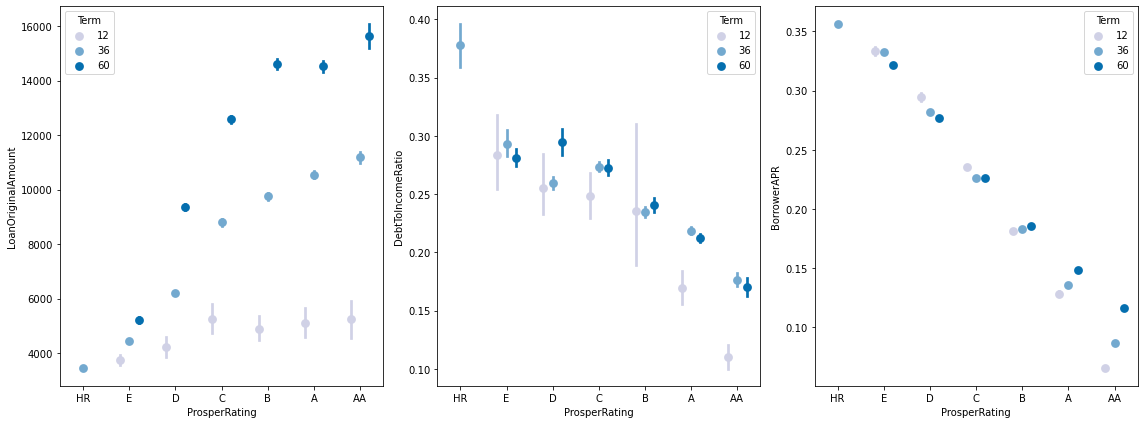

In [50]:
# Create a list of columns to plot on the y-axis
y_columns = ['LoanOriginalAmount','DebtToIncomeRatio', 'BorrowerAPR']

plt.figure(figsize=(16, 6))

for col, index in zip(y_columns, range(3)):
    plt.subplot(1, 3, index+1)
    sns.pointplot(data=loan_df, x='ProsperRating', y=col, hue='Term', linestyles='', palette='PuBu', dodge=0.4)
    
plt.tight_layout();

#### Observations
>- People with high prosper ratings, due to their higher incomes, tend to take huge loans on the platform, especially when the payback period is longer. This can be seen from the vertical distance between each point, for each prosper rating on the first plot. This behaviour seems to lead to a notable increase in Debt-to-income ratio among the highest rated individuals (**AA** and **A**). This can be observed by comparing the vertical distance between 12-month and 36-month loans, across each prosper rating group on the second plot.
>- The association between borrower APR and loan amount reverses direction (from negative to positive) with increasing prosper ratings. This is probably because high-rated borrowers may tend to abuse their advantage by borrowing more money, especially over the long term. As a lending platform, the best way to control this may be increasing APR for huge long-term loans, to account for the risk to investors, and disincentivize borrowers from "overborrowing" huge sums. 
>- The decreasing APR for low-rated borrowers also makes sense. This could be a great way to encourage them to take long-term loans where they are fully able to pay back their debts.